In [161]:
import matplotlib.pyplot as plt
import math
import copy
import datetime


In [2]:
pip install mplhep

Note: you may need to restart the kernel to use updated packages.


In [121]:
import mplhep as hep

In [122]:
plt.style.use([hep.style.ROOT])

In [123]:
def getVal(value):
    if isinstance(value, float):
        return value
    val = 1 
    if "*" in value:
        for i in value.split("*"):
            val *= float(i)
        return val
    else:
        return float(value)

In [124]:
def plotDataFromFile(file_name):
    xvals = []
    central = []
    errorup = []
    errordown = []
    error2up = []
    error2down = []
    with open(file_name) as input_file:
        for line in input_file:
            if line[0] == "#":
                continue
            values = line.split()
            if len(values) < 2:
                raise InvalidArgument("Invalid input file %s" % file_name)
            xvals.append(getVal(values[0]))
            central.append(getVal(values[1]))
            if len(values) < 3:
                print("No error values found in input file %s" % file_name)
                continue
            if "%" in values[2]:
                values[2] = float(values[1])*float(values[2].strip("%"))/100
            if "%" in values[3]:
                values[3] = float(values[1])*float(values[3].strip("%"))/100
            errorup.append(getVal(values[2]))
            errordown.append(getVal(values[3]))
            if len(values) == 6:
                error2up.append(math.sqrt(getVal(values[2])**2 + getVal(values[4])**2))
                error2down.append(math.sqrt(getVal(values[3])**2 + getVal(values[5])**2))
    return xvals, central, errorup, errordown, error2up, error2down

In [193]:
def plotData(x, y, statup, statdown, totup, totdown, label):
    data_noerr_args = {
    'markersize' : 8, 
    }
    
    if "ATLAS" in label:
        data_noerr_args["markerfacecolor"] = 'w'
        
    data_args = copy.deepcopy(data_noerr_args)
    data_args['capsize'] = 4
    data_args['fmt'] = 'ok'
    if r"\nu" in label:
        data_args["fmt"] = 'sk'

    plt.errorbar(x,y,yerr=[totup,totdown], **data_args)
    plt.errorbar(x,y,yerr=[statup, statdown], **data_args)
    return plt.plot(x,y, data_args['fmt'], label=label, **data_noerr_args)

    

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


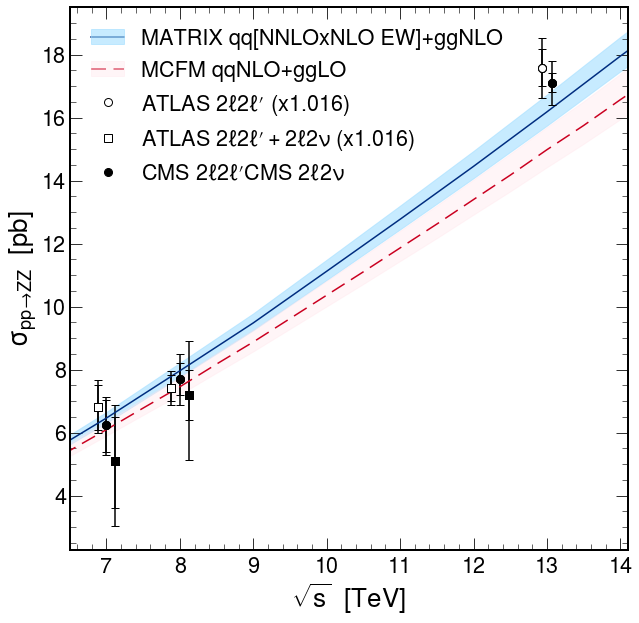

In [200]:
(x,y,systup, systdown, statup, statdown) = plotDataFromFile("data/ZZ_nnlo_values.txt")
nnlo = plt.plot(x,y,'#002D80')
nnlo_fill = plt.fill_between(x, [i+e for i,e in zip(y, systup)], [i-e for i,e in zip(y, systdown)], color='#A3DFFF',alpha=.6)

(x,y,systup, systdown, statup, statdown) = plotDataFromFile("data/ZZ_scan_values_removebr_fixedscale.txt")
nlo = plt.plot(x,y, '#ca0020', dashes=[10, 5,], label="")
nlo_fill = plt.fill_between(x, [i+e for i,e in zip(y, systup)], [i-e for i,e in zip(y, systdown)], color='#FFE6EC',alpha=.4)

atlas_4l = plotData(*plotDataFromFile("data/ZZ_ATLAS_measurements.txt"), label=r"ATLAS $2\ell2\ell\prime$ (x1.016)")
atlas_2l2v = plotData(*plotDataFromFile("data/ZZ_2l2v_ATLAS_measurements.txt"), label=r"ATLAS $2\ell2\ell\prime+2\ell2\nu$ (x1.016)")
cms_4l = plotData(*plotDataFromFile("data/ZZ_CMS_measurements.txt"), label=r"CMS $2\ell2\ell\prime$")
cms_2l2v = plotData(*plotDataFromFile("data/ZZ_2l2v_CMS_measurements.txt"), label=r"CMS $2\ell2\nu$")

plt.xlim(6.5,14.1)
plt.ylabel(r"$\sigma_{\mathrm{pp}\to\mathrm{ZZ}}$  [pb]")
plt.xlabel("$\sqrt{s}$  [TeV]")

#plt.legend(handles=[(nnlo[0], nnlo_fill[0]), (nlo[0], nlo_fill[0]), atlas_4l[0], cms_4l[0]], addloc='upper left')#, bbox_to_anchor=(0.5, 0.5))
plt.legend([(nnlo[0], nnlo_fill), (nlo[0], nlo_fill), atlas_4l[0], atlas_2l2v[0], cms_4l[0], cms_2l2v[0]], 
           ["MATRIX qq[NNLOxNLO EW]+ggNLO", "MCFM qqNLO+ggLO",
            r"ATLAS $2\ell2\ell\prime$ (x1.016)",
            r"ATLAS $2\ell2\ell\prime+2\ell2\nu$ (x1.016)",
            r"CMS $2\ell2\ell\prime$"
            r"CMS $2\ell2\nu$"
], loc='upper left')

fig = plt.gcf()
fig.savefig("ZZCrossSection_{:%Y-%m-%d}.pdf".format(datetime.datetime.today()))
fig.show()